# Natural Language Processing
- discipline in computing that deals with communication b/w natural(human) land and computer languages.
- ex like spell check, auot complete

## Recurrent Neural Networks
- Much more capable of processing sequential data as text or characters call RNN
- using RNN we do Sentiment Analysis, Character Generation
- RNN's are complex and come in many diff forms

## Sequence Data
- we will look at sequences of text and learn how to encode them in a meaningful way.Unlike images seq data such as long chains of text, weather patterns, videos where the notion of a step or time is relevant needs to be processes and handled in aspl way.
- textual data contains many words that follow in avery specific and meaningful order we need to be able to keep track of each word and when it occurs in the data.
- Simply encodeing a para of text into one data point wont give us a menaingful picture of data and wpud be difficult to do anything with it.
- This is the reason we treat text as sequence and process one word at a time. we will keep track of each word appeared and use that info to try to understand the menaing of pieces of text.

## Encoding Text
- machine learning models and NN does not take raw text as i/p
- we need to encode the etxtual data to numeric values that our models understand

1) Bag Of Words:
- look at training data set and make a dictionary of vocabulary(lookup table/ word index table)
- keep track of words present and their frequency
- we loose the ordering of words appeared
- useful for simple tasks and fast way to encode

In [3]:
#simple function how BOW appear
vocab = {}
word_encoding = 1

def bag_of_words(text):
    global word_encoding
    
    words = text.lower().split(" ")
    bag = {}
    
    for word in words:
        if word in vocab:
            encoding = vocab[word]
        else:
            vocab[word] = word_encoding
            encoding=word_encoding
            word_encoding+=1
        if encoding in bag:
            bag[encoding]+=1
        else:
            bag[encoding]=1
    return bag

text = "This is a test to see if this test will work is is test a a"
bag =bag_of_words(text)
print(bag)
print(vocab)

{1: 2, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


2) Word Embeddings:
- Try to find a way to repr words that are similar using similar numbers
- classify or translate every word into a vector and the vector will have 32/64/128 dimensiions and every single component of the vector tells us wt group it belongs to and how similar it to other words

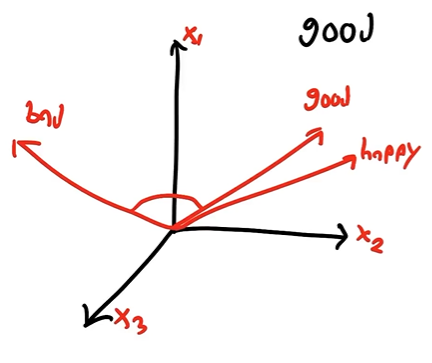

# Recurrent Neural Network (RNN's)
- In all the NN's like Convnet, NN we used feed-forward ie all of our data is fed forwards from left to right through network.But this does not word for processing the text as we dont process the text at once.
- RNN is a network that contians a loop. A RNN will process one word ata time while maintaining an internal memory of wt its already seen.
- This allows us to treat words differently based on their order in a ssentencs and slowly build an understanding of the entire input, one word at a time.
- Due to this reason we are treating our text data as a sequence, so that we can pass one word at a time.

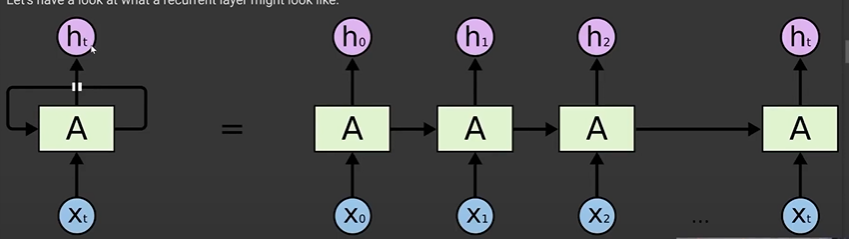
xt - input at time t
ht - output at time t
A - reccurent layer
- In this simple RNN layer, recurrent layer processes words or input one at a time in a combination with the o/p from the prev iteration. So as we progress furter in the i/p seq we build a more complex understanding of the as a whole.
- there are 2 different types of recuurent Layers
## LSTM(Long Short Term Memory)
- we add another component to the simple recurrent layer to keep track of the internal state(prev o/p)
- ability to access the o/p from any prev state at any time of future that we want ie rather than keeping track of previous o/p add all of the o/p that we have seen so far(like lookup table)
- way to access inputs from any timestep int he past
- wehave long term memory data structure storing all the previously seen inputs as well as when they saw them

## Sentiment Analysis
- the process of computionally identifying and categorizing opinions expresssed in a piece if text, especially in order to determine whether the writers attitude towards a particular topic, product, etc... is ppositive,negative or neutral
- Int= this example we clasify the movie reviews as +,- or neutral
### Movie Review Dataset
- we load dataset from keras
- it contains 25,000 reviews from IMDB where each one is already preprocessd and has a label as either positive or negative
- each review is encoded by integers that represents how common a word is in the dataset.

In [24]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import pad_sequences
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE =  88584
MAX_LEN = 250
BATCH_SIZE = 64

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE)

In [11]:
len(train_data[1]) # one review,len

189

### More Preprocessing
- The loaded reviews has different lengths.We can not pass diff length data into our neural network and hence we must make each review the same length
- if the review > 250 words - trim of extra word
- if the review < 250 words - add necessary amt of 0's to make it equal to 250

In [13]:
train_data = pad_sequences(train_data, MAX_LEN)
test_data = pad_sequences(test_data, MAX_LEN)

### Creating the Model 
- we use word embedding layer as the 1st layer in our model and a LSTM layer afterwards that feeds into a dense node to get our predeicted sentiment
- 32 stands for the o/p dimension of vectors generated by the embedding layer

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          2834688   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


### Training

In [20]:
model.compile( optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 38s 58ms/step - loss: 0.4185 - accuracy: 0.8098 - val_loss: 0.3119 - val_accuracy: 0.8680
Epoch 2/10
625/625 [==============================] - 32s 51ms/step - loss: 0.2385 - accuracy: 0.9085 - val_loss: 0.2658 - val_accuracy: 0.8920
Epoch 3/10
625/625 [==============================] - 35s 56ms/step - loss: 0.1841 - accuracy: 0.9320 - val_loss: 0.3461 - val_accuracy: 0.8784
Epoch 4/10
625/625 [==============================] - 32s 51ms/step - loss: 0.1567 - accuracy: 0.9444 - val_loss: 0.3066 - val_accuracy: 0.8880
Epoch 5/10
625/625 [==============================] - 33s 52ms/step - loss: 0.1312 - accuracy: 0.9544 - val_loss: 0.3342 - val_accuracy: 0.8764
Epoch 6/10
625/625 [==============================] - 34s 54ms/step - loss: 0.1132 - accuracy: 0.9613 - val_loss: 0.2916 - val_accuracy: 0.8880
Epoch 7/10
625/625 [==============================] - 32s 52ms/step - loss: 0.0989 - accuracy: 0.9657 - val_loss: 0.3156 - val_accuracy:

In [21]:
# evaluate the model
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 13s 16ms/step - loss: 0.4335 - accuracy: 0.8530
[0.43351149559020996, 0.8530399799346924]


### Making Predicions
- Since our reviews are well, we need to convert any review that we write into that form so that network can understand.
- to do so we load the encodungs from the dataset and use them to encode our own data

In [28]:
word_index = imdb.get_word_index()

def encode_text(text):
    tokens = tf.keras.preprocessing.text.text_to_word_sequence(text)
    tokens = [word_index[word] if word in word_index else 0 for word in tokens]
    return pad_sequences([tokens],MAX_LEN)[0]

text = 'that movie is just amazing, so amazing'
encoded = encode_text(text)
print(encoded)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  12  17   6  4

In [29]:
# decode function

reverse_word_index = {value:key for (key,value) in word_index.items()}

def decode_integers(integers):
    PAD=0
    text=""
    for num in integers:
        if num!=PAD:
            text+=reverse_word_index[num]+' '
    return text[:-1]

print(decode_integers(encoded))

that movie is just amazing so amazing


In [43]:
# make a prediction

def predict(text):
    encoded_text = encode_text(text)
    pred = np.zeros((1,250))
    pred[0] = encoded_text
    result = model.predict(pred)
    print(result[0])
    
positive_review = "The movie wass so awesome! I really loved it and would watch it again because it was amazingly great"
predict(positive_review)

negative_review = "that movie sucked. I hated it and wouldn't watch it again. was one of the worst things i ever watched"
predict(negative_review)    

1/1 [==============================] - 0s 19ms/step
[0.89588004]
1/1 [==============================] - 0s 18ms/step
[0.42704082]


## RNN Play Generator
- example of a RNN to recreate and learn how too write a version oof its own.
- we do this using a character predictive model that will take a i/p var len seq and predict the nxt char.
- we use this model many times in a row with the o/p from the last prediction as the i/p for the nxt call to generate a seq

In [44]:
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

### Dataset
- we need only one piece of training data.
- we can write our own poem/play and pass that to the network for traning

In [45]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 1s 1us/step


In [46]:
# read contents of the file, decode for py2 compat
text = open(path_to_file,'rb').read().decode(encoding='utf-8')
# len og txt is no of char in it
print('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [47]:
# look at 1st 250 char
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



### Encoding
- since the text is not encoded, we encode each unique char as diff integer

In [51]:
vocab = sorted(set(text))
# creating a mapping from unique characters to indices
char2index = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_int(text):
    return np.array([char2index[c] for c in text])

text_as_int = text_to_int(text)

In [52]:
# look how it works
print("Text:",text[:13])
print("Encoded:",text_to_int(text[:13]))

Text: First Citizen
Encoded: [18 47 56 57 58  1 15 47 58 47 64 43 52]


In [53]:
# function that can convert our numeric values to text

def int_to_text(ints):
    try:
        ints = ints.numpy()
    except:
        pass
    return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:13]))

First Citizen


### Creating Training Examples
- our task is to feed the model a seq and have it return to us the next char
- we need to split our text data from above into many shrter seq that we can pass to the model as training exampes
- the training eq we will prepare will use seq_len seq as i/p and seq_len as the o/p where that seq is original seq shifted one letter to right


In [54]:
# 1st step is to create a stream of characters from our text data

seq_length = 100 # len of seq for training example
examples_per_epoch = len(text)//(seq_length+1)

# creat training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [55]:
# we use batch method to turn this stream of char into batches of desired len

sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [56]:
# now we use these sequences of len 101 and split them into i/p and o/p

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text
dataset = sequences.map(split_input_target) # use map to aply above funt to every entry

In [57]:
for x, y in dataset.take(2):
    print('\n\nEXAMPLE\n')
    print("INPUT")
    print(int_to_text(x))
    print("\nOUTPUT")
    print(int_to_text(y))



EXAMPLE

INPUT
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You

OUTPUT
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 


EXAMPLE

INPUT
are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you 

OUTPUT
re all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you k


In [59]:
# make training batches

BATCH_SIZE = 64
VOCAB_SIZE = len(vocab) # vocab is no of unique characterss
EMBDDING_DIM = 256
RNN_UNITS = 1024

# Buffer size to shuffle the data
BUFFER_SIZE = 10000

data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE,drop_remainder=True)

### Building the model
- embedding layer as LSTM and one dense layer that contains nodes for each unique character in our training data.
- the dense layer gives the prob disribution over all nodes

In [60]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model=tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                 batch_input_shape=[batch_size, None]),
        tf.keras.layers.LSTM(rnn_units,
                            return_sequences=True,
                            stateful=True,
                            recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model
model = build_model(VOCAB_SIZE, EMBDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           16640     
                                                                 
 lstm_1 (LSTM)               (64, None, 1024)          5246976   
                                                                 
 dense_1 (Dense)             (64, None, 65)            66625     
                                                                 
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


### Creating Loss Function
- create our own loss function, because our model will o/p a(64,seq_len,65) shaped tensor that repr the prob distribution of each char at each timestamp for every seq in batch
- before that we look at sample i/p and o/p from unrained model

In [61]:
for input_example_batch, target_example_batch in data.take(1):
    example_batch_predictions = model(input_example_batch) # ask our model for prediction on our 1st batch of traning data
    print(example_batch_predictions.shape,"# (batch_size,sequence_length,vocab_size)") # print o/p shape

(64, 100, 65) # (batch_size,sequence_length,vocab_size)


In [62]:
# prediction is an array of 64 arrays, one for each entry in the batch
print(len(example_batch_predictions))
print(example_batch_predictions)

64
tf.Tensor(
[[[ 1.45258557e-03 -8.52099061e-03 -5.44557394e-03 ... -7.11517059e-04
    1.94108579e-05 -1.24229433e-03]
  [ 4.26020846e-03 -6.17075432e-03 -6.28844416e-03 ...  2.17613857e-03
    1.27748528e-03  1.72746892e-04]
  [ 3.63328960e-04 -4.25432157e-03 -9.57868702e-04 ...  4.84385900e-03
   -4.90642851e-04  3.68071534e-03]
  ...
  [ 5.85170323e-03 -7.77199399e-04 -5.46342228e-03 ... -4.41610487e-03
   -1.75783387e-03  5.09435264e-03]
  [ 1.80679641e-03  3.54128052e-03 -1.01334397e-02 ... -7.13828951e-04
    4.28900914e-03 -2.21967557e-03]
  [ 8.32390692e-03  3.59183154e-03 -4.39037755e-03 ...  2.53110612e-03
    3.42351478e-03  4.11949493e-03]]

 [[ 6.40570652e-03  2.13981024e-04  8.03389214e-03 ...  3.19588813e-04
   -7.14358117e-04  3.11788032e-03]
  [ 6.19402854e-03 -7.85976090e-03 -1.29041960e-04 ... -7.91187049e-04
    2.62259273e-05  1.99012109e-04]
  [ 1.62287196e-03 -3.32620018e-03  5.25130425e-03 ... -5.79965534e-03
   -2.75556627e-03  5.63238561e-03]
  ...
  [ 1.117

In [64]:
# examine one prediction
pred = example_batch_predictions[0]
print(len(pred))
print(pred)# this is a 2d array of len 100, where each interior array is the prediction for the next char at each timrstep

100
tf.Tensor(
[[ 1.4525856e-03 -8.5209906e-03 -5.4455739e-03 ... -7.1151706e-04
   1.9410858e-05 -1.2422943e-03]
 [ 4.2602085e-03 -6.1707543e-03 -6.2884442e-03 ...  2.1761386e-03
   1.2774853e-03  1.7274689e-04]
 [ 3.6332896e-04 -4.2543216e-03 -9.5786870e-04 ...  4.8438590e-03
  -4.9064285e-04  3.6807153e-03]
 ...
 [ 5.8517032e-03 -7.7719940e-04 -5.4634223e-03 ... -4.4161049e-03
  -1.7578339e-03  5.0943526e-03]
 [ 1.8067964e-03  3.5412805e-03 -1.0133440e-02 ... -7.1382895e-04
   4.2890091e-03 -2.2196756e-03]
 [ 8.3239069e-03  3.5918315e-03 -4.3903776e-03 ...  2.5311061e-03
   3.4235148e-03  4.1194949e-03]], shape=(100, 65), dtype=float32)


In [65]:
# prediction at the 1st timestep
time_pred = pred[0]
print(len(time_pred))
print(time_pred)
# it is 65 values repr the prob of each char occuring next

65
tf.Tensor(
[ 1.4525856e-03 -8.5209906e-03 -5.4455739e-03 -2.9485570e-03
 -2.4777642e-03 -6.2551373e-03  3.2334179e-03  5.9520891e-03
  1.5827972e-03 -3.9678179e-03  1.4555377e-03  4.7270721e-03
  1.1129834e-03 -3.3299087e-03 -6.1506033e-04 -7.0706778e-03
 -2.0356043e-03  1.1210512e-02  3.6299240e-03 -2.6087416e-03
 -5.8622668e-03  7.7717011e-03  5.0847809e-04  1.0749737e-03
 -5.9924880e-03 -6.9169169e-03 -2.1394822e-03  6.8099680e-03
 -1.3397385e-03  7.7228919e-03  4.3451022e-03  7.5969826e-03
 -3.4903483e-03  3.4745059e-03 -5.9146667e-04  2.2634442e-03
  9.4265421e-04  2.7257320e-03 -2.3278575e-03  2.3330080e-03
  7.3028146e-04  1.3750885e-04  5.0244583e-03 -7.2324341e-03
 -8.8722268e-03  2.2084313e-04 -2.1775259e-04 -4.1903253e-04
 -1.4503580e-03  2.3505439e-03 -1.4779123e-04 -4.1512903e-03
  5.1800460e-03 -6.7706937e-03 -1.1558088e-03 -1.8230806e-03
 -2.3789303e-03  2.6345833e-03  7.0889620e-04 -3.7596300e-03
 -2.3127634e-03 -2.7485052e-03 -7.1151706e-04  1.9410858e-05
 -1.242294

In [66]:
# to det the predicted char we need to sample the o/p distribution
sampled_indices = tf.random.categorical(pred, num_samples=1)

# we can reshape the array and convert all the integers to numbers to see the actual char
sampled_indices = np.reshape(sampled_indices,(1,-1))[0]
predicted_chars = int_to_text(sampled_indices)

predicted_chars # model predicted for traning seq 1

"Bk;QMcl?T$W&?'rZ!x:Se$gObSDOooryDHFxwOZ3Jmi$PSH!NCrSIpBfSoh&yfCIi.PWs,FLgjbvXSeX3?Hhfi-nfWrhF,e3 gvY"

In [67]:
# we create the loss function that can compare that o/p to the expected o/p and give us some numeric val repr how close the 2 were
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels,logits,from_logits=True)

### Compiling the Model
- our prob i a classification prob where the model predicts the prob of each unique letter coming next

In [68]:
model.compile(optimizer='adam',loss=loss)

### Creating the Checkpoints
- Setup and configure our model to save checkpoint as it trains.
- allows us to load our model from a checkpoint and continue training it

In [69]:
# directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# name of checkpoints files
checkpoint_prefix = os.path.join(checkpoint_dir,"ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

### Training

In [71]:
history = model.fit(data, epochs=2, callbacks=[checkpoint_callback])

Epoch 1/2
172/172 [==============================] - 500s 3s/step - loss: 1.7837
Epoch 2/2
172/172 [==============================] - 514s 3s/step - loss: 1.5776


### Loading The Model
- we will rebuild the model from a checkpoint using a batch_size of 1 ao that we can feed one piece of text to the model and hav it make a prediction

In [74]:
model = build_model(VOCAB_SIZE, EMBDDING_DIM, RNN_UNITS, batch_size=1)

In [76]:
# once the model finishe training we can find the latest checkpoint that stores the models weights
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1,None]))

In [78]:
# we can load any checkpoint we want by specifying the exact file to load

checkpoint_num=10
model.load_weights(tf.train.load_checkpoint("./training_checkpoint/ckpt_"+str(checkpoint_num)))
model.build(tf.TensorShape([1,None]))

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./training_checkpoint/ckpt_10

### Generating Text
- function to generate some text using any starting string

In [87]:
def generate_text(model, start_string):
    # eval step
    # no of char to generate
    num_generate = 100
    # converting our start string to numbers(vectorizing)
    input_eval = [char2index[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval,0)
    
    # Empty string t o store our results
    text_generated = []
    
    # low temp results in more predictable tex
    # higher temp - surprising text
    # experiment to find best string
    temperature = 1.0
    
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        # remove batch dim
        predictions=tf.squeeze(predictions,0)
        
        #using a categorical distribution to predict the char returned by model
        predictions = predictions/temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        
        # we pass the predicted char as the next i/p to the model along with the prev hidden state
        input_eval = tf.expand_dims([predicted_id],0)
        
        text_generated.append(idx2char[predicted_id])
    return (start_string+''.join(text_generated))
    

In [88]:
inp = input("Type a starting string: ")
print(generate_text(model,inp))

Type a starting string: hello
hellow's and
So saling words, which our own hands,
Hath I and tere fow the duke, away tought
Clove undant
